In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
# to see all columns
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Finding columns with missing values

In [5]:
def finding_null_features(df):
    null = df.isnull().sum().sort_values(ascending=False)
    null = null[null > 0]
    null_perc = round(null / len(df) *100, 2)
    #create a dataframe
    null_df = pd.DataFrame(null, columns=['null_count'])
    null_df['null_perc'] = null_perc
    return null_df

In [6]:
# finding null features in training set
finding_null_features(train)

,null_count,null_perc
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [7]:
# drop features with more than 75% missing values
df_null = finding_null_features(train)
# drop the columns
drop_cols = df_null[df_null['null_perc'] > 75].index.tolist()
print('Columns with more than 75% missing values are : ', drop_cols)
#train.drop(drop_cols, inplace=True)

Columns with more than 75% missing values are :  ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


In [8]:
# drop those columns
train.drop(drop_cols,axis=1, inplace=True)

### Check for correlation between features

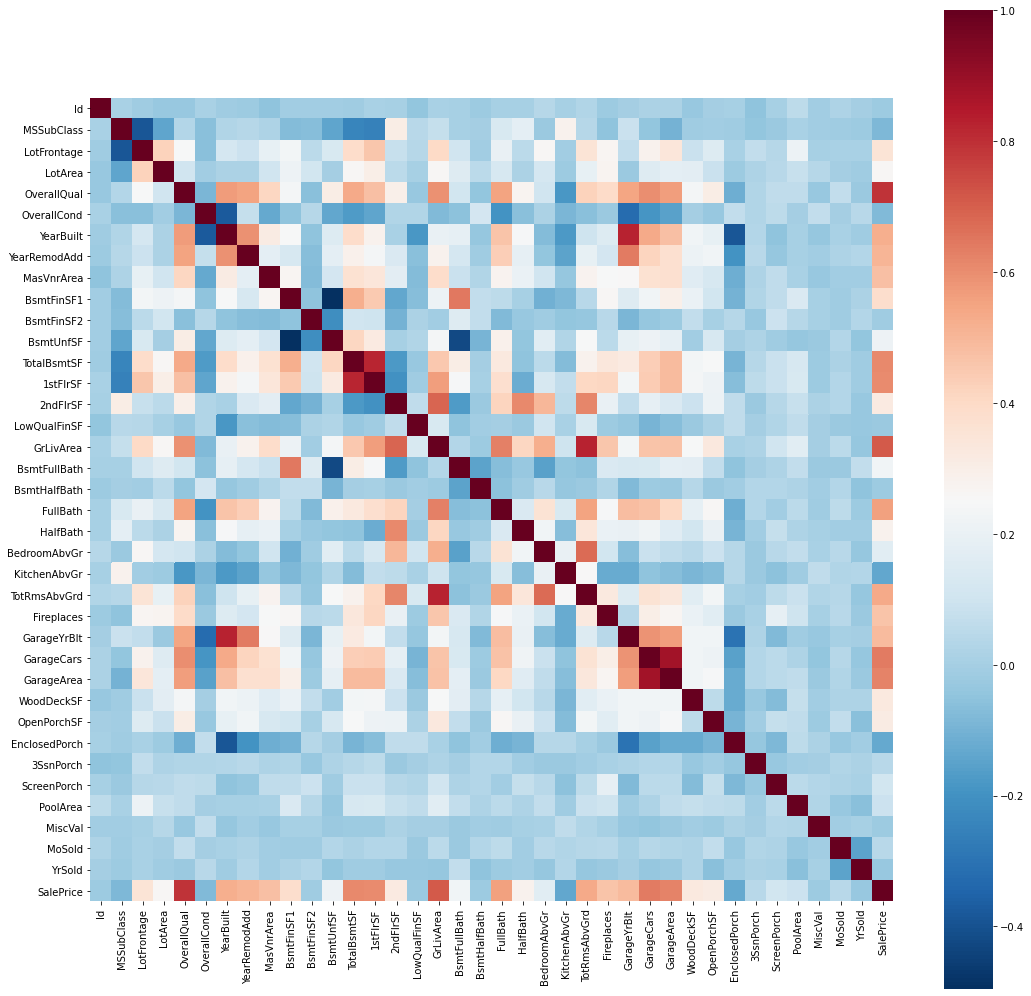

In [9]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
sns.heatmap(train.corr(), square=True, cmap= plt.cm.RdBu_r) #mask=np.tril(train.corr()))

### * Features that are most related from the heatmap*
- SalePrice and OverallCond
- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea
- TotalBsmtSF and 1stFlrSF
- GarageArea and GarageCars

### * Features that are highly correlated with SalePrice from the heatmap*
- OverallQual
- GrLivArea
- TotalBsmtSF
- 1stFlrSF
- GarageCars
- GarageArea

### *Correlation matrix for SalePrice*

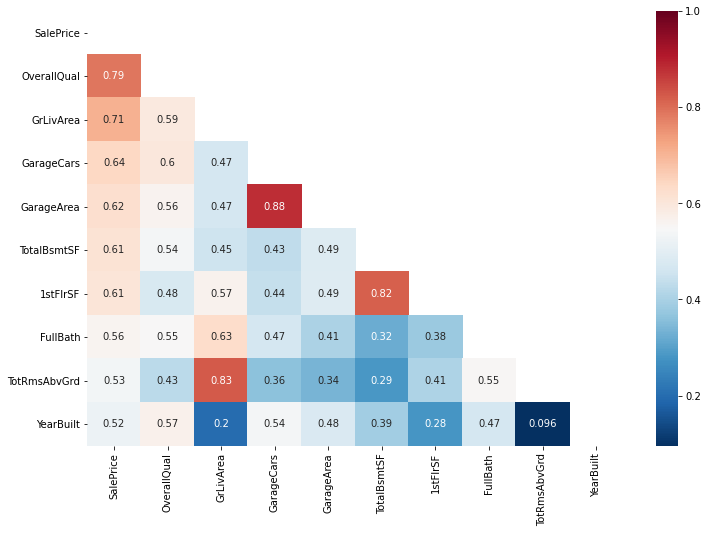

In [10]:
k=10
# select the top k columns
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(12,8))
mask = np.triu(train[cols].corr())
sns.heatmap(train[cols].corr(), annot=True, cmap=plt.cm.RdBu_r, mask = mask)

### * Top 10 features related to SalePrice *

In [11]:
train.corr().nlargest(10, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### * Pairplot between top K features related to SalePrice*

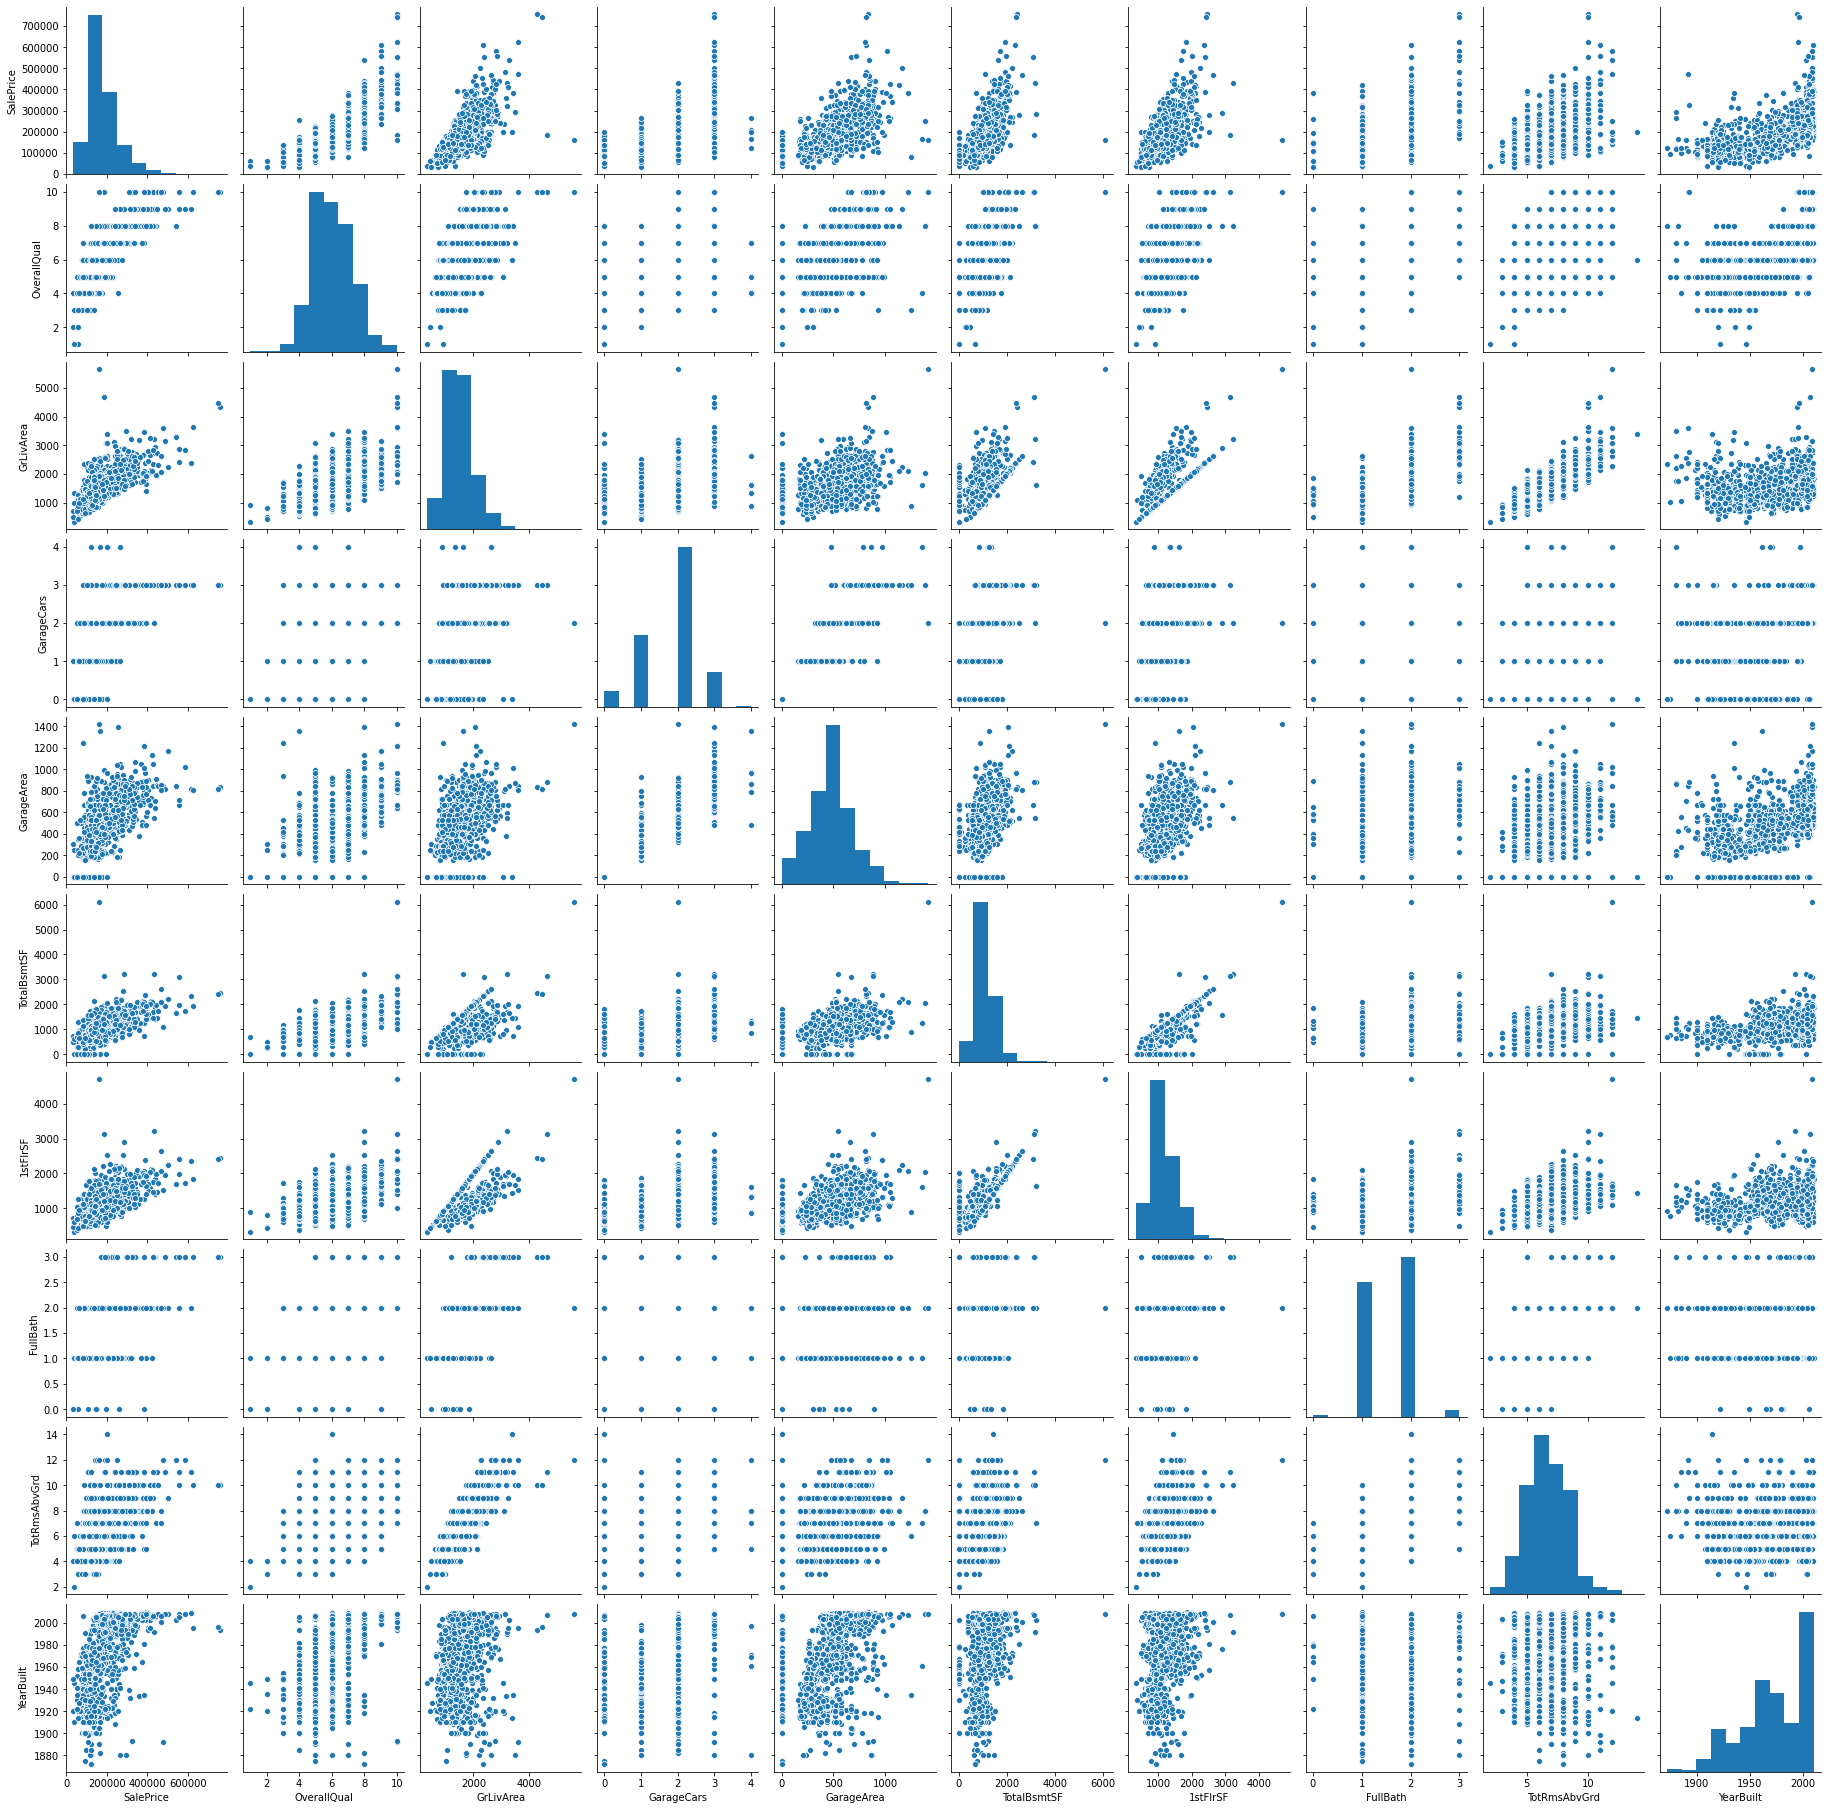

In [12]:
cols = train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
sns.pairplot(train[cols])

### * Removing columns(correlated with each other) and that are also correlated with SalePrice*

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [14]:
cols_drop = ['GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd']
cols_drop
train.drop(cols_drop, axis=1, inplace=True)

### *Fill the missing values*

In [15]:
finding_null_features(train)

,null_count,null_perc
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtCond,37,2.53
BsmtQual,37,2.53


### * Finding Categorical and Numeric features *

In [16]:
features_obj = train.select_dtypes(include=['object']).columns
features_numeric = train.select_dtypes(exclude=['object']).columns
print('Categorical features, count: {} \n'.format(len(features_obj)))
display(features_obj)
print('Numerical features, count: {}\n'.format(len(features_numeric)))
display(features_numeric)

Categorical features, count: 39 



Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Numerical features, count: 34



Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### *Fill missing features*
- *categorical* - with mode
- *numerical* - with mean

In [17]:
def fill_missing(df):
    features_obj = df.select_dtypes(include=['object']).columns.tolist()
    features_numeric = df.select_dtypes(exclude=['object']).columns.tolist()
    
    for col in features_obj:
        df[col] = df[col].fillna(df[col].mode()[0])
    for col in features_numeric:
        df[col] = df[col].fillna(df[col].mean())
    
    return df

In [18]:
fill_missing(train)
#check if there any missing values
finding_null_features(train)

,null_count,null_perc


### *Check for outliers*
- Outliers can affect our predictions
- Note these features were already dropped: 'GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'
- Examine the outliers in the shortlisted features that are highly correlated SalePrice
    - 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath'

In [19]:
train.corr().nlargest(10, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
TotalBsmtSF     0.613581
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Fireplaces      0.466929
Name: SalePrice, dtype: float64

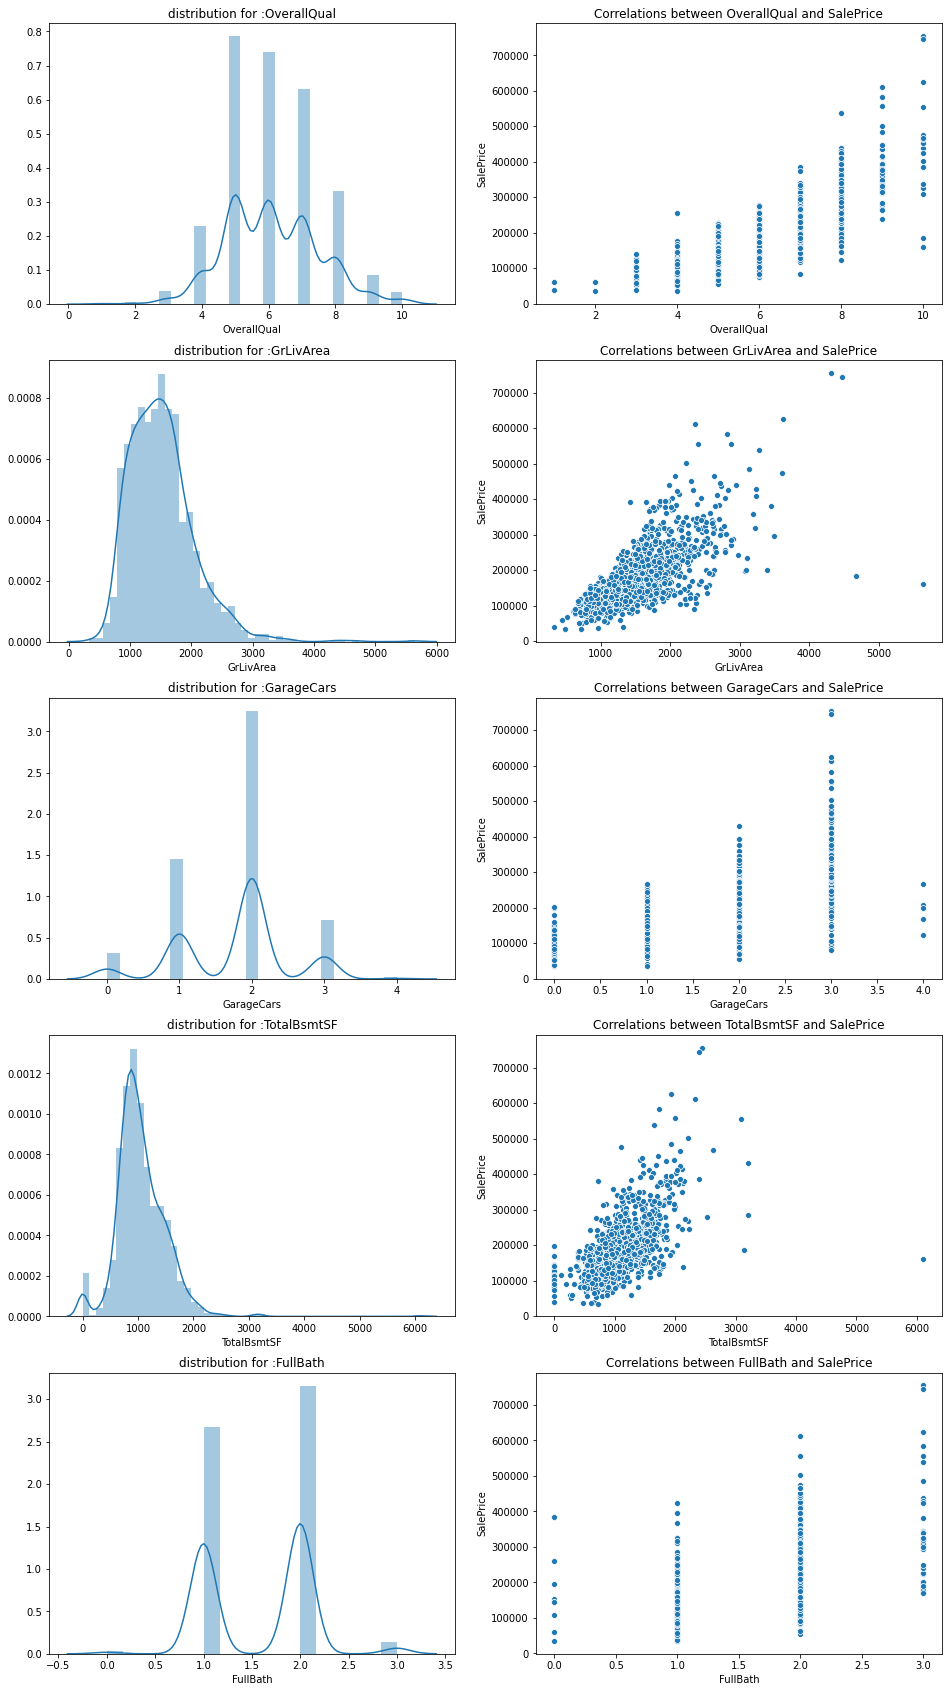

In [20]:
plt.figure(figsize=(16, 30))
for idx, feature in enumerate(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']):
    plt.subplot(5, 2, 2*idx + 1)
    sns.distplot(train[feature])
    plt.title('distribution for :' +str(feature))
    plt.subplot(5, 2, 2*idx + 2)
    sns.scatterplot(x = train[feature], y=train['SalePrice'])
    plt.title('Correlations between '+ str(feature) + ' and' + str(' SalePrice'))

### *Removing outliers in *
- 'GrLivArea' :  > 4000
- 'TotalBsmtSF > 6000

In [21]:
# selecting those indexes for which the SalePrice was lower for the search condition
remove_index1 = train[train['GrLivArea'] > 4000]['SalePrice'].sort_values()[:2].index.tolist()

remove_index2 = train[train['TotalBsmtSF'] > 6000].index.tolist()
display(remove_index1)
display(remove_index2)
train.drop(remove_index1, axis=0, inplace=True)

[1298, 523]

[1298]

In [22]:
train.shape

(1458, 73)

### *SalePrice distribution*
- 'SalePrice' does not have a normal distribution
    - is positively skewed
    - Outliers observed > 400,000
   

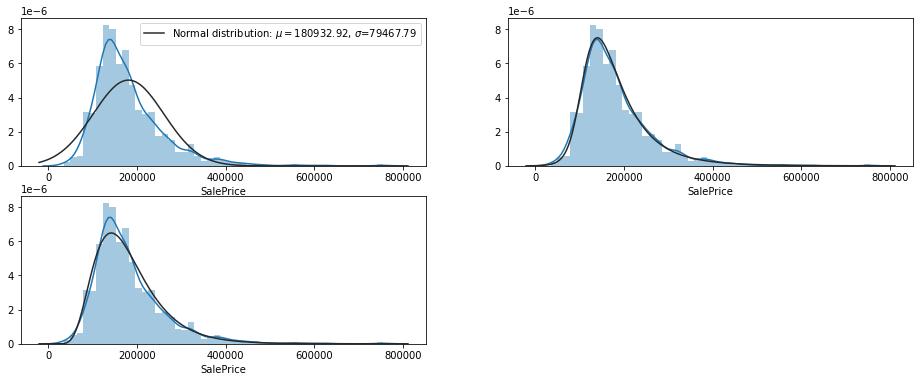

In [23]:
from scipy import stats
plt.figure(figsize=(16, 6))
plt.subplot(2,2,1)
sns.distplot(train['SalePrice'], fit = stats.norm)
# mean and std deviation for the norma distribution
(mu, sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal distribution: $\mu=${:.2f}, $\sigma$={:.2f}'.format(mu, sigma)])

plt.subplot(2,2,2)
sns.distplot(train['SalePrice'], fit = stats.johnsonsu)
#(mu, sigma) = stats.johnsonsu.fit(train['SalePrice'])
#plt.legend(['Johnson distribution: $\mu=${:.2f}, $\sigma$={:.2f}'.format(mu, sigma)])

plt.subplot(2,2,3)
sns.distplot(train['SalePrice'], fit = stats.lognorm)


In [24]:
stats.johnsonsu.fit(train['SalePrice'])

(-1.570203730830023, 1.4904653289122811, 93802.77107911701, 55293.540203340584)

### *In case of positive skewness, log tranformation helps to normalize the distribution*

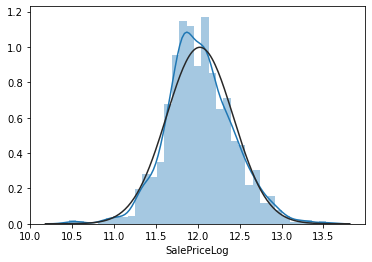

In [25]:
train['SalePriceLog'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePriceLog'], fit= stats.norm)

### Encode categorical variables

In [26]:
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [27]:
obj_cols = train.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
# apply the label encoder to each of the columns
train[obj_cols] = train[obj_cols].apply(le.fit_transform)
train[obj_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,0,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,0,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,0,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4


In [75]:
y_train_log = train['SalePriceLog']
y_train = train['SalePrice']
X_train = train.drop(['Id','SalePrice', 'SalePriceLog'], axis=1)

In [76]:
# y_log = train['SalePriceLog']
# y = train['SalePrice']
# X = train.drop(['Id','SalePrice', 'SalePriceLog'], axis=1)

# # y_log = y_log.values.reshape(-1,1)
# # sc = StandardScaler()
# # X = sc.fit_transform(X)
# # y_log = sc.transform(y_log)
# sc.transform(y.values.reshape(-1,1))

In [62]:
print(X.shape, y_log.shape)

(1458, 71) (1458,)


## Test set
- *Now we will apply the same steps to test data*

In [30]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
display(drop_cols)
display(cols_drop)

test.drop(drop_cols, axis=1, inplace=True)
test.drop(cols_drop, axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

['GarageYrBlt', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd']

In [32]:
# filling the missing values in test
test = fill_missing(test)
# Encode the categorical variables in test
obj_cols = test.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
# apply the label encoder to each of the columns
test[obj_cols] = test[obj_cols].apply(le.fit_transform)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,0,0,896,0.0,0.0,1,0,2,1,3,6,0,2,1,2,1.0,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,0,0,1329,0.0,0.0,1,1,3,1,2,6,0,2,1,2,1.0,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,701,0,1629,0.0,0.0,2,1,3,1,3,6,1,4,1,0,2.0,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,678,0,1604,0.0,0.0,2,1,3,1,2,6,1,2,1,0,2.0,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,0,0,1280,0.0,0.0,2,0,2,1,2,6,0,2,1,1,2.0,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


In [33]:
finding_null_features(test)

,null_count,null_perc


### * Cross validation*

In [34]:
# root mean squared error
def rmse(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y_pred, y))
    return rmse

# cross validation
def rmse_cv(model, X, y):
    score = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
    print(score.mean(), score.std())

In [35]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

### *Defining as 'scoring' funtion for GridSearchCV*
- there is no existing scoring function to compute root mean squared error

In [36]:
def rmse_scoring(y_pred, y):
    return np.sqrt(mean_squared_error(y, y_pred))

# for use in GridSearchCV
scorer = make_scorer(rmse_scoring)

### Linear Model

In [83]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit_transform(X_train).shape

(1458, 71)

In [87]:
from sklearn.preprocessing import RobustScaler
lr = LinearRegression()
rs = RobustScaler()

# scale the train
X_train = rs.fit_transform(X_train)

# X_test = test

# y_pred = lr.predict(X_train)
# y_pred

In [88]:
rmse_cv(lr, X_train, y_train_log)

0.12279946844509226 0.004898187078259174


In [97]:
lr.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### RandomForestregressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
parameters = {'max_depth': [14, 18], 'n_estimators': [500,700,900]}
rf_search = GridSearchCV(rf, parameters, cv=5, scoring=scorer) # using customer scorer
rf_search.fit(X_train, y_train)
rf_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
rf = rf_search.best_estimator_
rmse_cv(rf, X_train, y_train_log)

0.13553073306807334 0.005108220009653565


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rmse_cv(rf, X_train, y_train_log)

0.13571412815233974 0.0047155857457577685


### XGBoost

In [44]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

In [91]:
parameters = {'gamma': [0.01, 0.1, 0.001], 'learning_rate':[0.01, 0.1], 'n_estimators': [100, 300, 500, 1000]}
xgb_search = GridSearchCV(xgb, parameters, cv=5, scoring= scorer)
xgb_search.fit(X_train, y_train_log)
xgb_search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [93]:
# xgb = xgb_search.best_estimator_
# rmse_cv(xgb, X_train, y_train_log)

In [90]:
#XGBRegressor().get_params()
xgb = XGBRegressor()
rmse_cv(xgb, X_train, y_train_log)

0.13331277566172245 0.006645495624811247


### *Stacked Regressor*

In [94]:
from mlxtend.regressor import StackingCVRegressor
stack_model = StackingCVRegressor([lr, rf, xgb],
                                meta_regressor=lr,
                                use_features_in_secondary=True)

rmse_cv(stack_model, np.array(X_train), np.array(y_train_log))

0.12381181074715267 0.011286328327103617


### *Prediction on test data*

In [95]:
X_test = rs.fit_transform(test)

In [99]:
y_pred = np.exp(lr.predict(X_test))
y_pred
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [101]:
submission['SalePrice']= y_pred
submission.to_csv('submission.csv', index=False)

In [ ]:
# Brutal approach to deal with predictions close to outer range 
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

submission.to_csv("new_submission.csv", index=False)

### Neural Network training

In [45]:
# for keras loss function

from keras import backend as kb

def keras_custom_RMSE(y_true, y_pred):
    return kb.sqrt(kb.mean(kb.square(y_true - y_pred)))

Using TensorFlow backend.


In [104]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# for different kinds of kernel initializers
# refer: https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance

model = Sequential()
model.add(Dense(units=200, kernel_initializer='he_uniform', activation='relu', input_dim=71))
model.add(Dropout(rate=0.2))
model.add((Dense(units=100, kernel_initializer='he_uniform', activation='relu')))
model.add(Dropout(rate=0.2))
model.add((Dense(units=50, kernel_initializer='he_uniform', activation='relu')))
model.add(Dense(units=1))

# to use 'root mean square eror', we need to define a custom function in keras, defined above
#optimizer= keras.optimizers.RMSprop(0.001)
model.compile(loss = keras_custom_RMSE, optimizer='Adamax')


# fit the model
# ref: https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

history = model.fit(X_train, y_train_log.values,
                     validation_split=0.2,
                     batch_size=16,
                     shuffle=True,
                     epochs=1000)

Train on 1166 samples, validate on 292 samples
Epoch 1/1000
1166/1166 [==============================] - 0s 326us/step - loss: 35.3282 - val_loss: 12.2991
Epoch 2/1000
1166/1166 [==============================] - 0s 143us/step - loss: 25.8523 - val_loss: 13.9937
Epoch 3/1000
1166/1166 [==============================] - 0s 156us/step - loss: 19.6503 - val_loss: 11.9911
Epoch 4/1000
1166/1166 [==============================] - 0s 134us/step - loss: 24.8968 - val_loss: 19.8590
Epoch 5/1000
1166/1166 [==============================] - 0s 135us/step - loss: 19.0331 - val_loss: 8.5263
Epoch 6/1000
1166/1166 [==============================] - 0s 134us/step - loss: 14.9595 - val_loss: 19.3598
Epoch 7/1000
1166/1166 [==============================] - 0s 153us/step - loss: 13.7392 - val_loss: 14.4067
Epoch 8/1000
1166/1166 [==============================] - 0s 138us/step - loss: 16.9035 - val_loss: 22.7746
Epoch 9/1000
1166/1166 [==============================] - 0s 136us/step - loss: 18.8242 - 

Epoch 77/1000
1166/1166 [==============================] - 0s 140us/step - loss: 4.6896 - val_loss: 2.0892
Epoch 78/1000
1166/1166 [==============================] - 0s 135us/step - loss: 3.5794 - val_loss: 2.2618
Epoch 79/1000
1166/1166 [==============================] - 0s 136us/step - loss: 2.4566 - val_loss: 2.0976
Epoch 80/1000
1166/1166 [==============================] - 0s 134us/step - loss: 2.8951 - val_loss: 2.3099
Epoch 81/1000
1166/1166 [==============================] - 0s 134us/step - loss: 3.6299 - val_loss: 2.2068
Epoch 82/1000
1166/1166 [==============================] - 0s 134us/step - loss: 2.8194 - val_loss: 2.3350
Epoch 83/1000
1166/1166 [==============================] - 0s 135us/step - loss: 3.0734 - val_loss: 2.3592
Epoch 84/1000
1166/1166 [==============================] - 0s 136us/step - loss: 3.4742 - val_loss: 4.3062
Epoch 85/1000
1166/1166 [==============================] - 0s 135us/step - loss: 2.6068 - val_loss: 2.7060
Epoch 86/1000
1166/1166 [============

1166/1166 [==============================] - 0s 134us/step - loss: 1.0319 - val_loss: 1.2180
Epoch 154/1000
1166/1166 [==============================] - 0s 135us/step - loss: 1.0186 - val_loss: 1.1756
Epoch 155/1000
1166/1166 [==============================] - 0s 135us/step - loss: 1.1132 - val_loss: 0.9902
Epoch 156/1000
1166/1166 [==============================] - 0s 134us/step - loss: 1.1917 - val_loss: 0.7828
Epoch 157/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.9880 - val_loss: 0.6027
Epoch 158/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.8938 - val_loss: 0.7075
Epoch 159/1000
1166/1166 [==============================] - 0s 134us/step - loss: 1.0148 - val_loss: 0.8425
Epoch 160/1000
1166/1166 [==============================] - 0s 135us/step - loss: 1.0069 - val_loss: 0.8070
Epoch 161/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.7813 - val_loss: 0.6671
Epoch 162/1000
1166/1166 [=================

Epoch 229/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.6358 - val_loss: 0.4557
Epoch 230/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.6642 - val_loss: 0.4580
Epoch 231/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.7533 - val_loss: 0.5572
Epoch 232/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.5293 - val_loss: 0.4639
Epoch 233/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.8130 - val_loss: 0.5272
Epoch 234/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.9019 - val_loss: 0.6649
Epoch 235/1000
1166/1166 [==============================] - 0s 132us/step - loss: 0.8410 - val_loss: 0.6993
Epoch 236/1000
1166/1166 [==============================] - 0s 132us/step - loss: 0.7593 - val_loss: 0.5495
Epoch 237/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.7353 - val_loss: 0.7761
Epoch 238/1000
1166/1166 [==

Epoch 305/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.4338 - val_loss: 0.3792
Epoch 306/1000
1166/1166 [==============================] - 0s 147us/step - loss: 0.4339 - val_loss: 0.4706
Epoch 307/1000
1166/1166 [==============================] - 0s 148us/step - loss: 0.4154 - val_loss: 0.3968
Epoch 308/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.6033 - val_loss: 0.5814
Epoch 309/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.4184 - val_loss: 0.5009
Epoch 310/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.4143 - val_loss: 0.4464
Epoch 311/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.4489 - val_loss: 0.4018
Epoch 312/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.4734 - val_loss: 0.4587
Epoch 313/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.5298 - val_loss: 0.5462
Epoch 314/1000
1166/1166 [==

Epoch 381/1000
1166/1166 [==============================] - 0s 159us/step - loss: 0.2728 - val_loss: 0.3000
Epoch 382/1000
1166/1166 [==============================] - 0s 139us/step - loss: 0.3132 - val_loss: 0.2773
Epoch 383/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.3771 - val_loss: 0.3997
Epoch 384/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.2559 - val_loss: 0.2795
Epoch 385/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.4268 - val_loss: 0.3127
Epoch 386/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.2539 - val_loss: 0.3836
Epoch 387/1000
1166/1166 [==============================] - 0s 140us/step - loss: 0.4078 - val_loss: 0.3074
Epoch 388/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.3529 - val_loss: 0.2741
Epoch 389/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.2724 - val_loss: 0.2694
Epoch 390/1000
1166/1166 [==

Epoch 457/1000
1166/1166 [==============================] - 0s 140us/step - loss: 0.2411 - val_loss: 0.2251
Epoch 458/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.3058 - val_loss: 0.2076
Epoch 459/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.3041 - val_loss: 0.2192
Epoch 460/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.2277 - val_loss: 0.2569
Epoch 461/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1969 - val_loss: 0.2056
Epoch 462/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.2128 - val_loss: 0.2255
Epoch 463/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.2805 - val_loss: 0.2050
Epoch 464/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.2359 - val_loss: 0.2201
Epoch 465/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.2266 - val_loss: 0.3137
Epoch 466/1000
1166/1166 [==

Epoch 533/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1872 - val_loss: 0.2666
Epoch 534/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1849 - val_loss: 0.1780
Epoch 535/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1798 - val_loss: 0.2237
Epoch 536/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.1559 - val_loss: 0.1821
Epoch 537/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.1534 - val_loss: 0.1854
Epoch 538/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.1737 - val_loss: 0.1922
Epoch 539/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.1811 - val_loss: 0.2053
Epoch 540/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1501 - val_loss: 0.2105
Epoch 541/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.3060 - val_loss: 0.1935
Epoch 542/1000
1166/1166 [==

Epoch 609/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.1346 - val_loss: 0.1950
Epoch 610/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1219 - val_loss: 0.1851
Epoch 611/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1183 - val_loss: 0.1864
Epoch 612/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1194 - val_loss: 0.1812
Epoch 613/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1333 - val_loss: 0.1852
Epoch 614/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1350 - val_loss: 0.1760
Epoch 615/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.1367 - val_loss: 0.1820
Epoch 616/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.1285 - val_loss: 0.1906
Epoch 617/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1208 - val_loss: 0.1834
Epoch 618/1000
1166/1166 [==

Epoch 685/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.1102 - val_loss: 0.1588
Epoch 686/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1068 - val_loss: 0.1779
Epoch 687/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.1011 - val_loss: 0.1728
Epoch 688/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.1048 - val_loss: 0.1599
Epoch 689/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1079 - val_loss: 0.1832
Epoch 690/1000
1166/1166 [==============================] - 0s 147us/step - loss: 0.1128 - val_loss: 0.1593
Epoch 691/1000
1166/1166 [==============================] - 0s 139us/step - loss: 0.1074 - val_loss: 0.1538
Epoch 692/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.1145 - val_loss: 0.1709
Epoch 693/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.1103 - val_loss: 0.1670
Epoch 694/1000
1166/1166 [==

Epoch 761/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0900 - val_loss: 0.1630
Epoch 762/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.1062 - val_loss: 0.1607
Epoch 763/1000
1166/1166 [==============================] - 0s 144us/step - loss: 0.0987 - val_loss: 0.1685
Epoch 764/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.0912 - val_loss: 0.1660
Epoch 765/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0996 - val_loss: 0.1632
Epoch 766/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0918 - val_loss: 0.1698
Epoch 767/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0974 - val_loss: 0.1669
Epoch 768/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.1135 - val_loss: 0.1672
Epoch 769/1000
1166/1166 [==============================] - 0s 139us/step - loss: 0.0978 - val_loss: 0.1659
Epoch 770/1000
1166/1166 [==

Epoch 837/1000
1166/1166 [==============================] - 0s 142us/step - loss: 0.0918 - val_loss: 0.1588
Epoch 838/1000
1166/1166 [==============================] - 0s 145us/step - loss: 0.0891 - val_loss: 0.1595
Epoch 839/1000
1166/1166 [==============================] - 0s 144us/step - loss: 0.0860 - val_loss: 0.1651
Epoch 840/1000
1166/1166 [==============================] - 0s 140us/step - loss: 0.0863 - val_loss: 0.1595
Epoch 841/1000
1166/1166 [==============================] - 0s 141us/step - loss: 0.0856 - val_loss: 0.1736
Epoch 842/1000
1166/1166 [==============================] - 0s 144us/step - loss: 0.0906 - val_loss: 0.1762
Epoch 843/1000
1166/1166 [==============================] - 0s 143us/step - loss: 0.1156 - val_loss: 0.1586
Epoch 844/1000
1166/1166 [==============================] - 0s 143us/step - loss: 0.0897 - val_loss: 0.1622
Epoch 845/1000
1166/1166 [==============================] - 0s 141us/step - loss: 0.0927 - val_loss: 0.1715
Epoch 846/1000
1166/1166 [==

Epoch 913/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0836 - val_loss: 0.1650
Epoch 914/1000
1166/1166 [==============================] - 0s 138us/step - loss: 0.0798 - val_loss: 0.1639
Epoch 915/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0790 - val_loss: 0.1660
Epoch 916/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.0827 - val_loss: 0.1642
Epoch 917/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0828 - val_loss: 0.1620
Epoch 918/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0826 - val_loss: 0.1710
Epoch 919/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0834 - val_loss: 0.1570
Epoch 920/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0773 - val_loss: 0.1614
Epoch 921/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0798 - val_loss: 0.1666
Epoch 922/1000
1166/1166 [==

Epoch 989/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0876 - val_loss: 0.1648
Epoch 990/1000
1166/1166 [==============================] - 0s 137us/step - loss: 0.0798 - val_loss: 0.1782
Epoch 991/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0723 - val_loss: 0.1624
Epoch 992/1000
1166/1166 [==============================] - 0s 134us/step - loss: 0.0762 - val_loss: 0.1612
Epoch 993/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0774 - val_loss: 0.1798
Epoch 994/1000
1166/1166 [==============================] - 0s 135us/step - loss: 0.0871 - val_loss: 0.1721
Epoch 995/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0764 - val_loss: 0.1749
Epoch 996/1000
1166/1166 [==============================] - 0s 136us/step - loss: 0.0769 - val_loss: 0.1628
Epoch 997/1000
1166/1166 [==============================] - 0s 133us/step - loss: 0.0793 - val_loss: 0.1681
Epoch 998/1000
1166/1166 [==

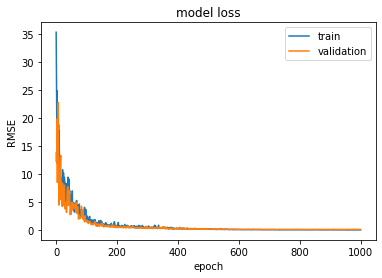

In [105]:
# plot loss vz epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [110]:
## NN prediction
y_pred = np.exp(model.predict(X_test))
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = y_pred
submission.to_csv('submission090420.csv', index=False)